I wanted to explore and manipulate the dataset that consisted of car information, especially because I am employed at a car company, and recently engaged in a non-work related conversation regarding the MPG (Miles Per Gallon) performance of cars and how it correlates with the efficiency of modern-day vehicles.

The first graph is a simple comparison chart showing the differences between the different type of cars that were availalbe in the chart.

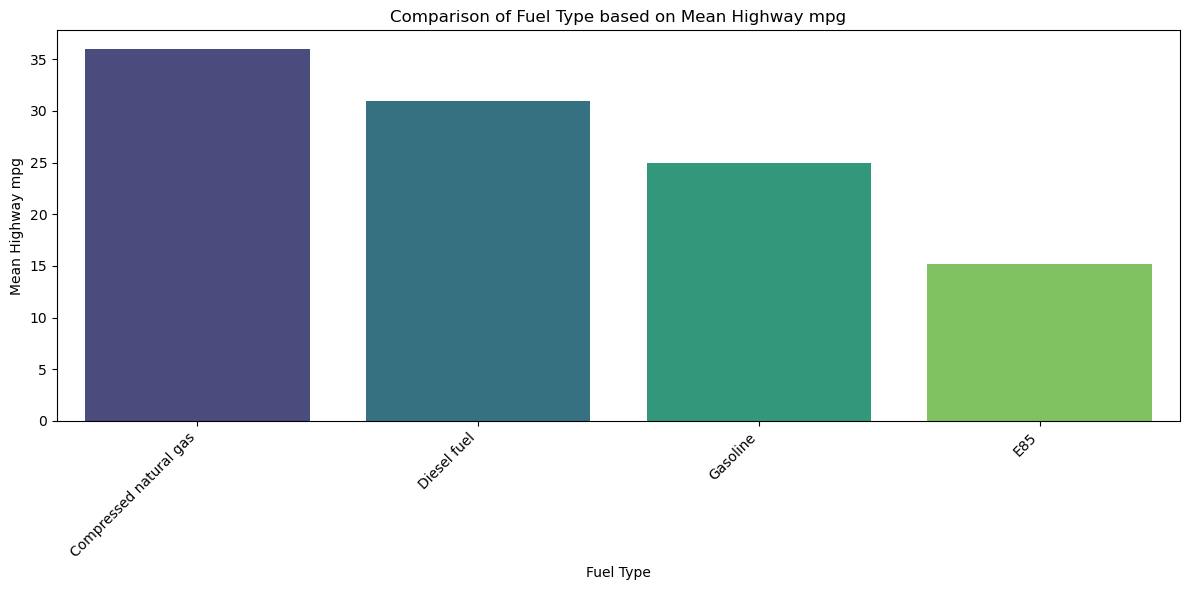

In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Extract relevant columns
fuel_data = df[['Fuel Information.Highway mpg', 'Fuel Information.Fuel Type']]

# Group data by Fuel Type and calculate the mean Highway mpg for each group
mean_highway_mpg = fuel_data.groupby('Fuel Information.Fuel Type')['Fuel Information.Highway mpg'].mean().reset_index()

# Sort data by mean Highway mpg in descending order
mean_highway_mpg = mean_highway_mpg.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Plot the comparison using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Fuel Information.Fuel Type', y='Fuel Information.Highway mpg', data=mean_highway_mpg, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Fuel Type')
plt.ylabel('Mean Highway mpg')
plt.title('Comparison of Fuel Type based on Mean Highway mpg')
plt.tight_layout()
plt.show()


We can tell a number of things from these charts; The chart visually ranks the fuel types based on their mean highway mpg. Fuel types with higher bars have better fuel efficiency in terms of miles covered per gallon of fuel.

We can determine general best performers from worst performers; It is easy to identify the fuel types that offer the best and worst mean highway mpg. The highest bar represents the most fuel-efficient fuel type, while the lowest bar represents the least fuel-efficient fuel type.

We can also guess at the adoption percentage; I wasn't aware of what E85 was before starting, which makes sense given its low MPG rating. I am surprise that Compressed Natural Gas appears to have the best MPG, but it also doesn't surprise me given that tankers, trucks, and other large vehicles use explicitly that type of fuel. Interestingly, I wonder if there are any standard car vehicles that offer that.

Then, I found out that there was a model year tag, and also an identification year tag. I wanted to give my hand at trying to plot a graph where I could compare the types of fuel and their performance over the data set that I had, leveraging the amount of data points that I had to create a good average. So, I started to work to it.

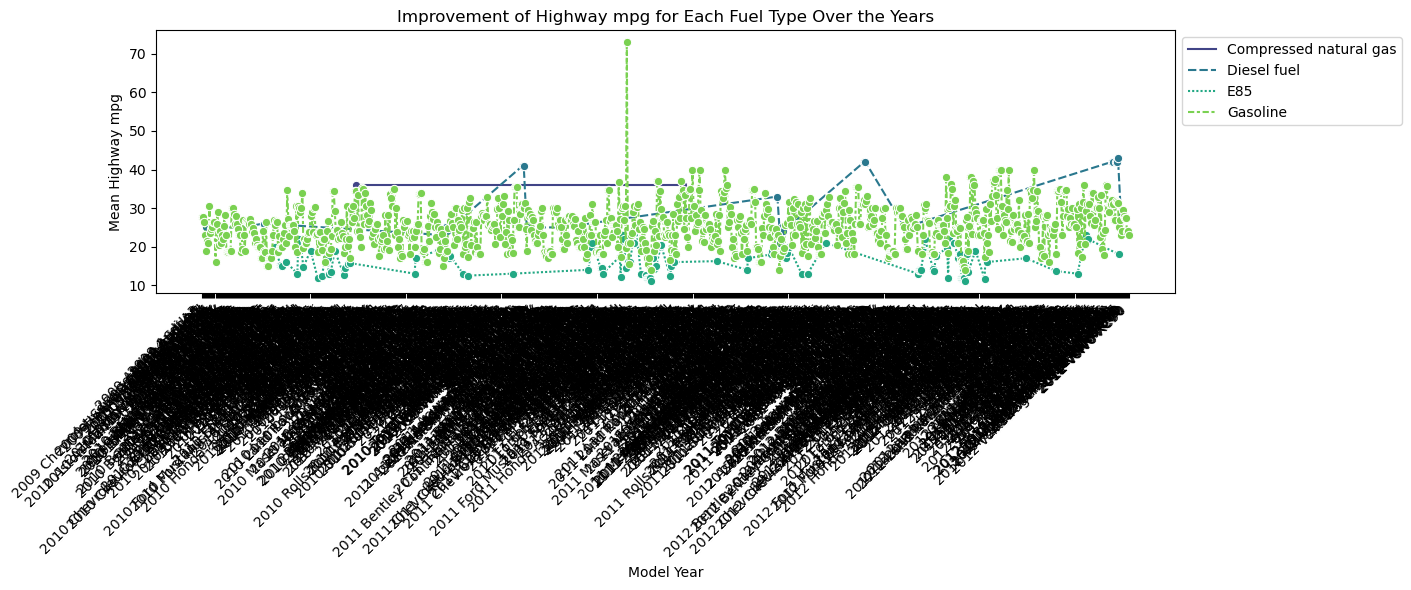

In [26]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Extract relevant columns
fuel_data = df[['Fuel Information.Highway mpg', 'Fuel Information.Fuel Type', 'Identification.Model Year']]

# Group data by Fuel Type and Model Year and calculate the mean Highway mpg for each group
mean_highway_mpg_by_year = fuel_data.groupby(['Fuel Information.Fuel Type', 'Identification.Model Year'])['Fuel Information.Highway mpg'].mean().reset_index()

# Sort data by Model Year in ascending order
mean_highway_mpg_by_year = mean_highway_mpg_by_year.sort_values(by='Identification.Model Year')

# Pivot the data to have Fuel Type as columns and Model Year as the index
pivot_table = mean_highway_mpg_by_year.pivot_table(index='Identification.Model Year', columns='Fuel Information.Fuel Type', values='Fuel Information.Highway mpg')

# Plot the comparison using a line plot for each fuel type
plt.figure(figsize=(12, 6))
sns.lineplot(data=pivot_table, palette='viridis', marker='o')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Year')
plt.ylabel('Mean Highway mpg')
plt.title('Improvement of Highway mpg for Each Fuel Type Over the Years')
plt.tight_layout()
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


As you can tell, in this graph, it isn't very easy to tell what's happening. There's far too many items on the X axis, to be able to make out any meaningful data, although it is interesting to see that compressed natural gas has a flat line. I can also see that there is a very high 70 miles per gallon rating for a specific car that is gasoline, which I will have to look into later. Although I couldn't get anything meaningful in terms of averages out of this chart, it is interesting to see the outliers, and the general shape of the data.

And not making a second child, or attempting for a second time, to show the difference between specific types of cars (gas cars, diesel cars, compressed natural gas cars), but this time, narrowing it down to only gas cars, to make it easier to make the chart.

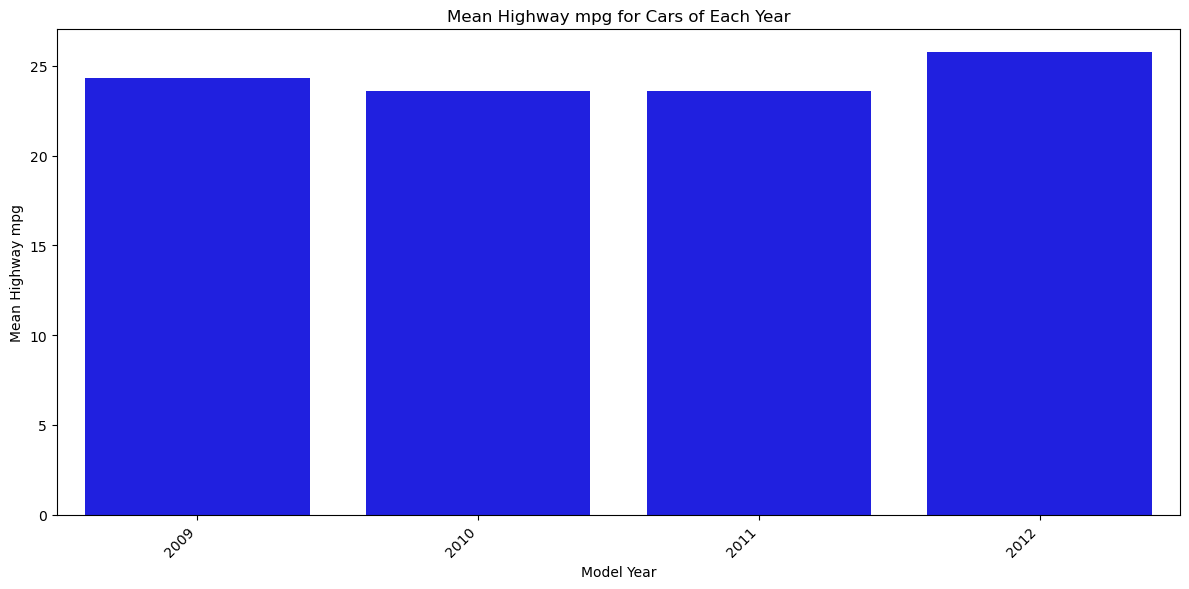

In [31]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Calculate the mean Highway mpg for cars with the same 'Identification.Year'
mean_highway_mpg_by_year = df.groupby('Identification.Year')['Fuel Information.Highway mpg'].mean()

# Plot the comparison using a bar plot
plt.figure(figsize=(12, 6))
sns.barplot(x=mean_highway_mpg_by_year.index, y=mean_highway_mpg_by_year.values, color='blue')
#plt.axhline(df['Fuel Information.Highway mpg'].mean(), color='red', linestyle='--', label='Overall Mean')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Year')
plt.ylabel('Mean Highway mpg')
plt.title('Mean Highway mpg for Cars of Each Year')
#plt.legend()
plt.tight_layout()
plt.show()


In the chart above, we can see that the MPG for gasoline cars did dip slightly between 2009, 2010, 2011, but rose at 2012. This is interesting, since it shows that there isn't a linear relationship, which makes me intrigued into why this is the case. I will look into this later, but for now, I will attempt to put all of these fuel types together.

In the chart below, I'm going to combine all of the different fuel types that we know of, diesel, compressed natural gas, gasoline, E85.

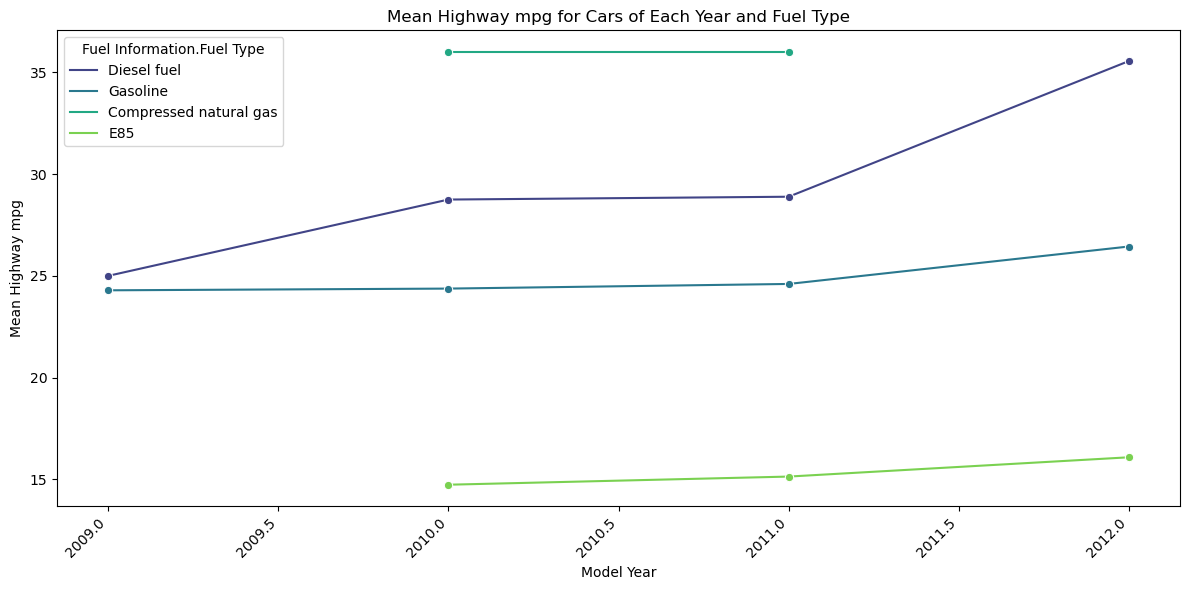

In [37]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Calculate the mean Highway mpg for cars with the same 'Identification.Year' and 'Fuel Information.Fuel Type'
mean_highway_mpg_by_year_and_fuel = df.groupby(['Identification.Year', 'Fuel Information.Fuel Type'])['Fuel Information.Highway mpg'].mean().reset_index()

# Plot the comparison using a line plot for each fuel type
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_highway_mpg_by_year_and_fuel, x='Identification.Year', y='Fuel Information.Highway mpg', hue='Fuel Information.Fuel Type', palette='viridis', marker='o')
#plt.axhline(df['Fuel Information.Highway mpg'].mean(), color='red', linestyle='--', label='Overall Mean')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Year')
plt.ylabel('Mean Highway mpg')
plt.title('Mean Highway mpg for Cars of Each Year and Fuel Type')
#plt.legend()
plt.tight_layout()
plt.show()


In the chart above, we get our first look at a full comparison between all four different fuel types, and their rated MPG's. We can see that diesel fuel took a sharp increase towards 2012, and so did gasoline. We can also see that E85 took a small increase from 2011 to 2012, but all types of fuel had a pretty stagnant, non increase from 2010 to 2011. I'm interested to see the comparison between brands, but for now I will compare between automatics and manuals, to see if there's any difference. Again, the point of this study is to maximize miles per gallon, whether that is checking through a certain brand, or specific car model.

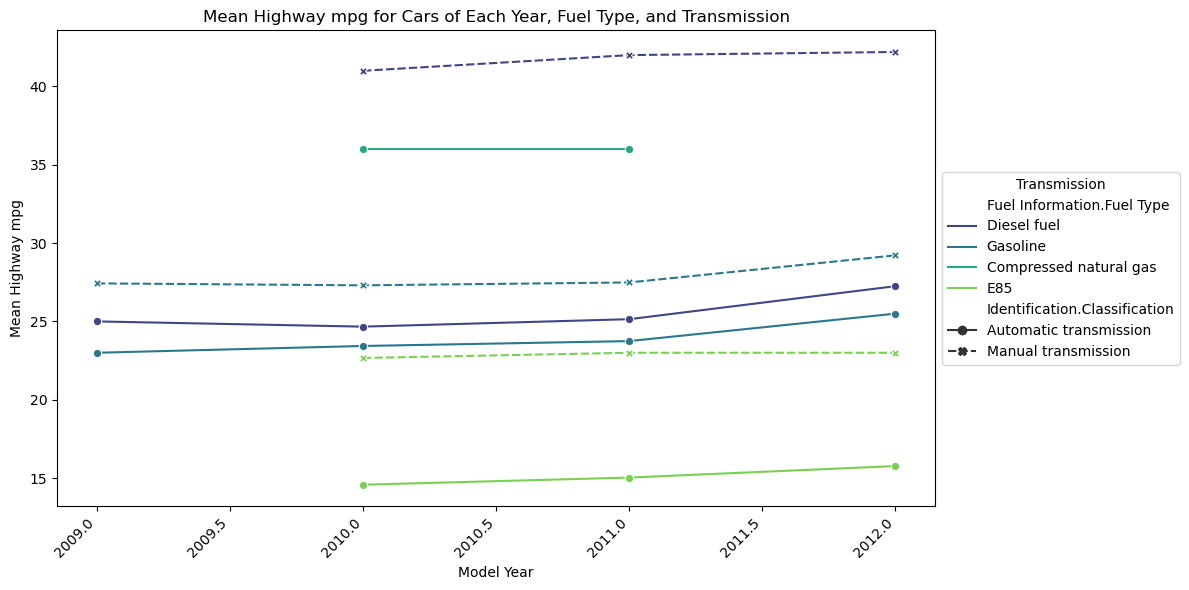

In [38]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Calculate the mean Highway mpg for cars with the same 'Identification.Year', 'Fuel Information.Fuel Type', and 'Identification.Classification'
mean_highway_mpg_by_year_fuel_auto_manual = df.groupby(['Identification.Year', 'Fuel Information.Fuel Type', 'Identification.Classification'])['Fuel Information.Highway mpg'].mean().reset_index()

# Plot the comparison using a line plot for each fuel type, split by automatic and manual transmissions
plt.figure(figsize=(12, 6))
sns.lineplot(data=mean_highway_mpg_by_year_fuel_auto_manual, x='Identification.Year', y='Fuel Information.Highway mpg', hue='Fuel Information.Fuel Type', style='Identification.Classification', markers=True, palette='viridis')
plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Year')
plt.ylabel('Mean Highway mpg')
plt.title('Mean Highway mpg for Cars of Each Year, Fuel Type, and Transmission')
plt.legend(title='Transmission', loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()


So, with this split of data, we can find that diesel manuals have had the highest miles per gallon rating consistently year over year from 2010 to 2012. We can see that it beats out compressed natural gas which is approximately above 35 miles per gallon, with diesel manual handling at around 40 plus miles per gallon. E85, both manual and automatic, take worse place, and automatic having under 15 miles per gallon approximately, and manual taking just over 20 miles per gallon. Interestingly enough, we can see that manual gasolines overtake automatic diesels, although not by much, especially compared to the margin that manual diesels dominate over every other sort of manual transmission car.

In this case, let's complicate it further with talking about the manufacturers of the cars.

C:\Users\nyx\AppData\Local\Temp\ipykernel_17928\2312010035.py:14: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=mean_highway_mpg_by_year_fuel_auto_manual_make, x='Identification.Year', y='Fuel Information.Highway mpg', hue='Identification.Make', style='Identification.Classification', markers=True, palette='viridis', ci=None, lw=1.5)


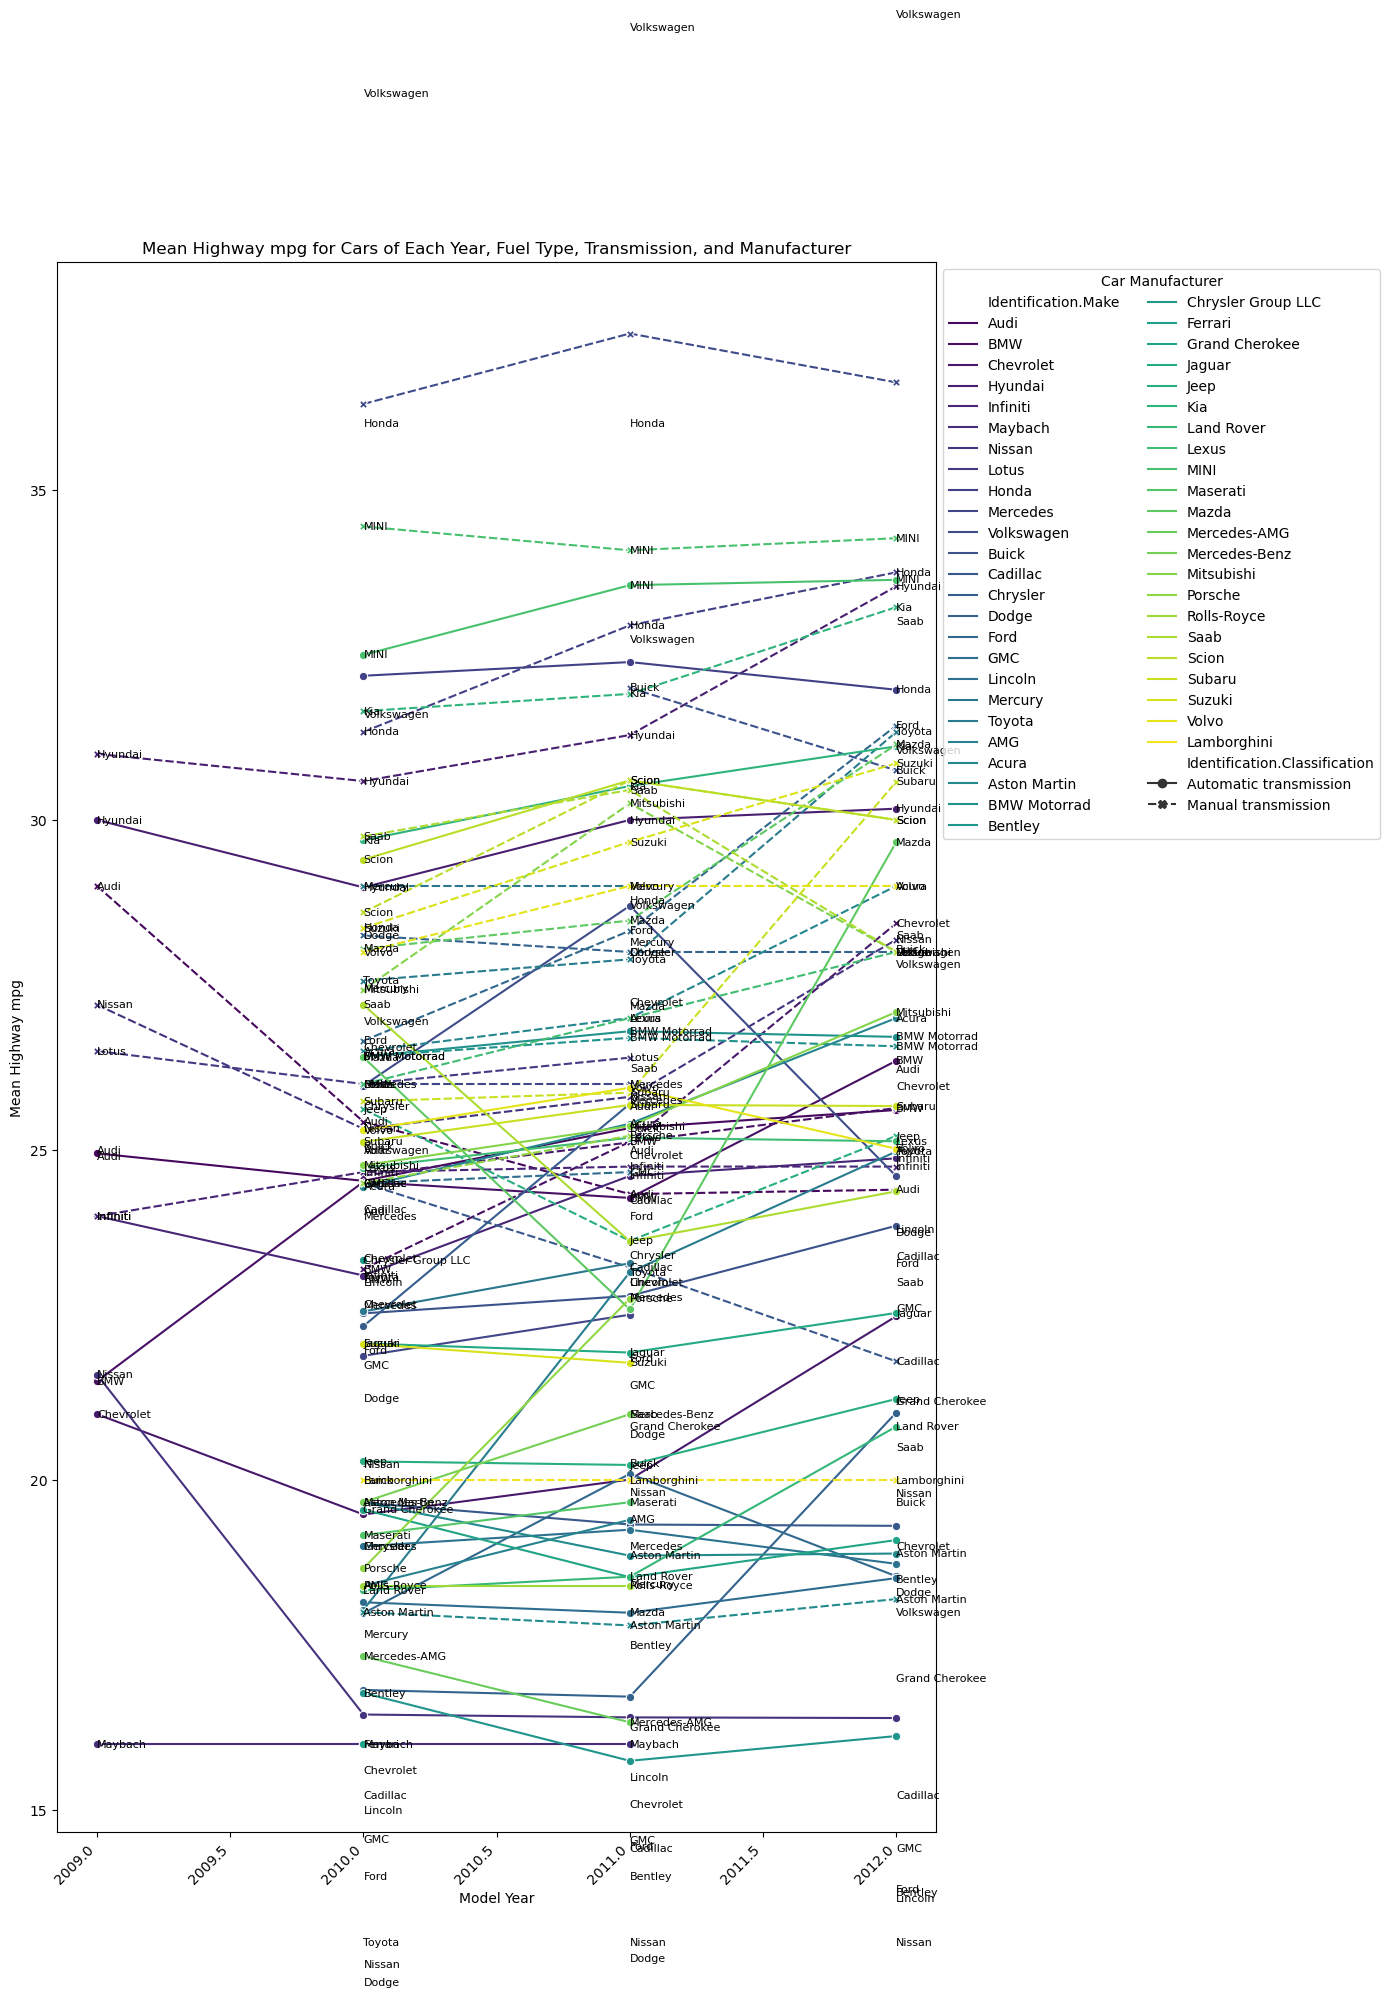

In [45]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Calculate the mean Highway mpg for cars with the same 'Identification.Year', 'Fuel Information.Fuel Type', 'Identification.Classification', and 'Identification.Make'
mean_highway_mpg_by_year_fuel_auto_manual_make = df.groupby(['Identification.Year', 'Fuel Information.Fuel Type', 'Identification.Classification', 'Identification.Make'])['Fuel Information.Highway mpg'].mean().reset_index()

# Plot the comparison using a line plot for each fuel type, split by automatic and manual transmissions, and further split by car manufacturer
plt.figure(figsize=(14, 20))
sns.lineplot(data=mean_highway_mpg_by_year_fuel_auto_manual_make, x='Identification.Year', y='Fuel Information.Highway mpg', hue='Identification.Make', style='Identification.Classification', markers=True, palette='viridis', ci=None, lw=1.5)

# Add labels next to the lines
for line in range(len(mean_highway_mpg_by_year_fuel_auto_manual_make)):
    x_pos = mean_highway_mpg_by_year_fuel_auto_manual_make['Identification.Year'].iloc[line]
    y_pos = mean_highway_mpg_by_year_fuel_auto_manual_make['Fuel Information.Highway mpg'].iloc[line]
    label = mean_highway_mpg_by_year_fuel_auto_manual_make['Identification.Make'].iloc[line]
    plt.text(x_pos, y_pos, label, fontsize=8, ha='left', va='center')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Year')
plt.ylabel('Mean Highway mpg')
plt.title('Mean Highway mpg for Cars of Each Year, Fuel Type, Transmission, and Manufacturer')
plt.legend(title='Car Manufacturer', bbox_to_anchor=(1, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()


Above, we can see how much of a mess it is, when I try to add every single car manufacturer on the list, in addition to keeping the labels on. Let us try to simplify this graph, and remove the automatic transmissions, and also remove the fuel types, just for now.

C:\Users\nyx\AppData\Local\Temp\ipykernel_17928\4196596176.py:18: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.lineplot(data=average_data, x='Identification.Year', y='Fuel Information.Highway mpg', hue='Identification.Make', marker='o', ci=None, lw=1.5)


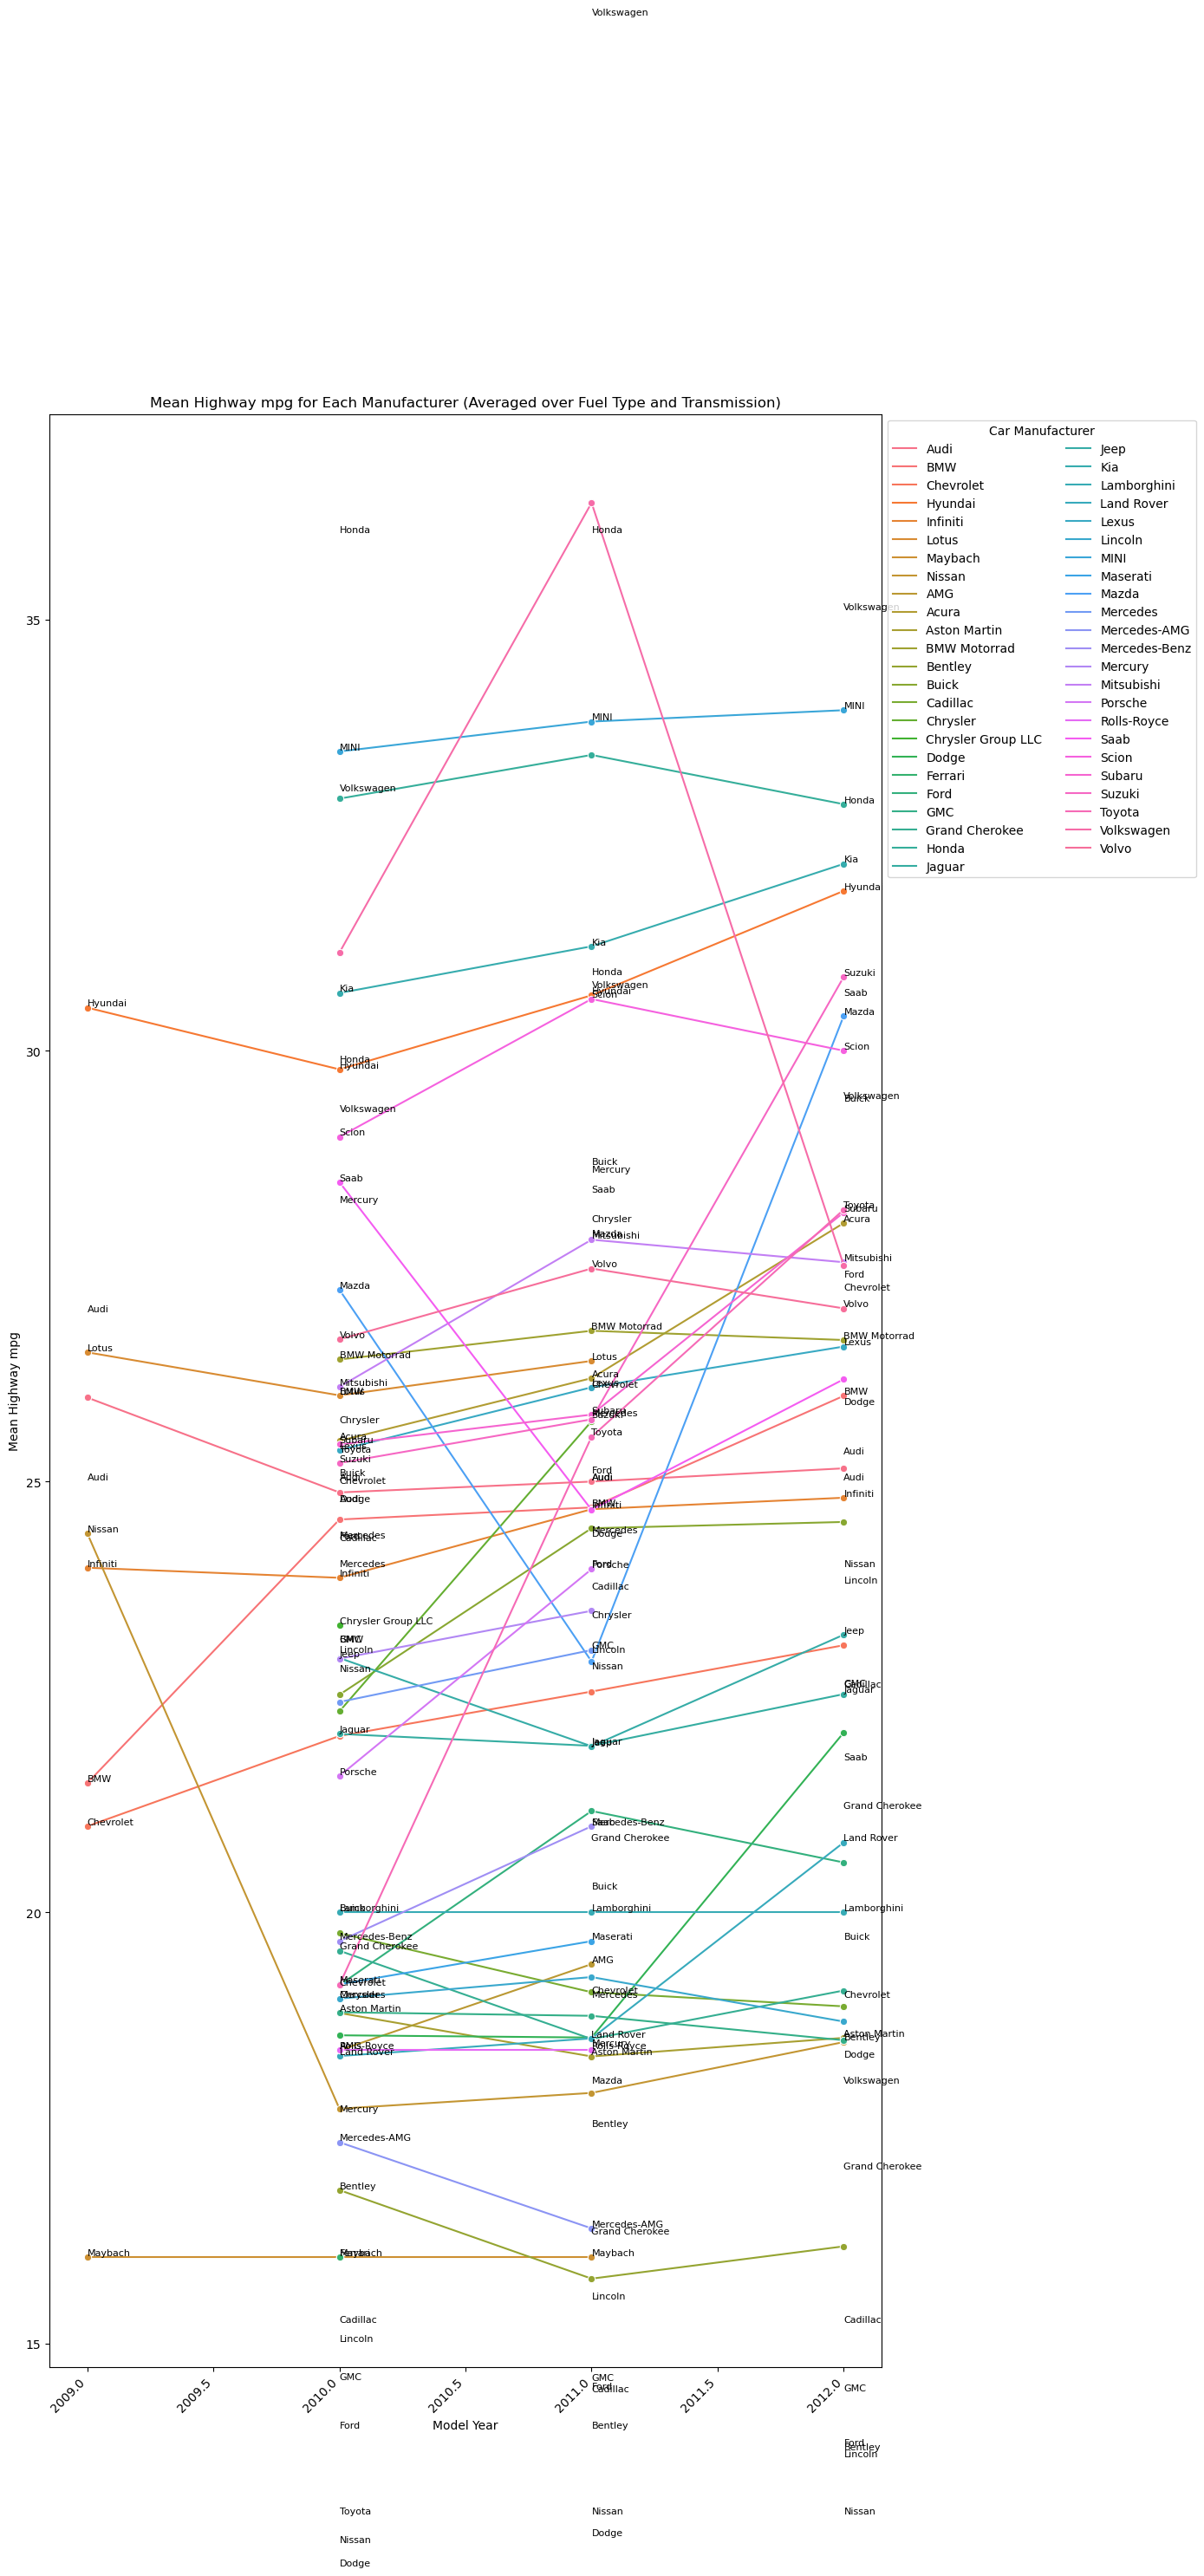

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Group the data by 'Identification.Year', 'Identification.Make', and 'Fuel Information.Fuel Type'
grouped_data = df.groupby(['Identification.Year', 'Identification.Make', 'Fuel Information.Fuel Type', 'Identification.Classification'])['Fuel Information.Highway mpg'].mean().reset_index()

# Average the mean 'Fuel Information.Highway mpg' values for automatic and manual transmissions
grouped_data['Identification.Classification'] = grouped_data['Identification.Classification'].map({'A': 'Automatic', 'M': 'Manual'})
average_data = grouped_data.groupby(['Identification.Year', 'Identification.Make', 'Fuel Information.Fuel Type'])['Fuel Information.Highway mpg'].mean().reset_index()

# Plot the comparison using a line plot for each manufacturer
plt.figure(figsize=(14, 30))
sns.lineplot(data=average_data, x='Identification.Year', y='Fuel Information.Highway mpg', hue='Identification.Make', marker='o', ci=None, lw=1.5)

# Add text labels for each manufacturer
for _, row in average_data.iterrows():
    x_pos = row['Identification.Year']
    y_pos = row['Fuel Information.Highway mpg']
    label = row['Identification.Make']
    plt.text(x_pos, y_pos, label, fontsize=8, ha='left', va='bottom')

plt.xticks(rotation=45, ha='right')
plt.xlabel('Model Year')
plt.ylabel('Mean Highway mpg')
plt.title('Mean Highway mpg for Each Manufacturer (Averaged over Fuel Type and Transmission)')
plt.legend(title='Car Manufacturer', bbox_to_anchor=(1, 1), loc='upper left', ncol=2)
plt.tight_layout()
plt.show()


Alright, we cannot still see that it is pretty big of a mess, although it is a very rainbow, colourful mess. Black invention, trade merging the different fuel types, and manual and automatic transmissions, however there is still much too much data to show at once. Also, as a side product of the chaos, the labeling is all wrong.

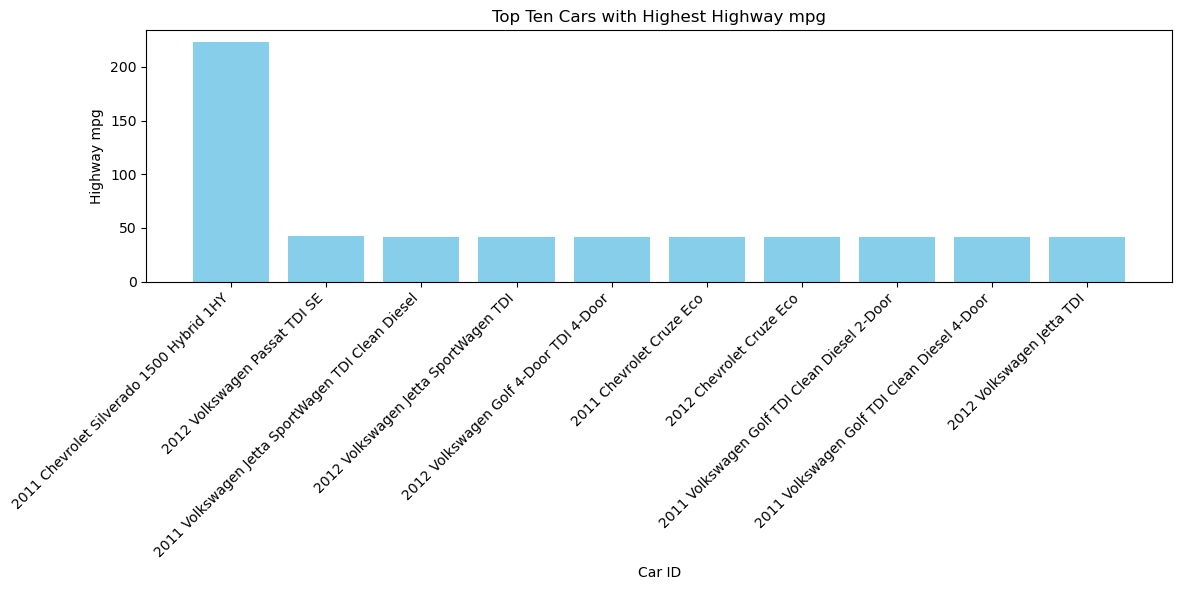

In [52]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Sort the data by 'Fuel Information.Highway mpg' in descending order
sorted_data = df.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Select the top ten cars based on 'Fuel Information.Highway mpg'
top_ten_cars = sorted_data.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_ten_cars['Identification.ID'], top_ten_cars['Fuel Information.Highway mpg'], color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Top Ten Cars with Highest Highway mpg')
plt.tight_layout()
plt.show()


Interestingly, we can see that there is one specific outlier, which could mean that the data isn't sanitized, or it could mean that there is an extremely good year for Chevrolet. I think that it is most likely a data error, so I will investigate the data, but I do have a feeling that it is a hybrid, since hybrids do not display miles per gallon properly, nor do electric vehicles (in certain circumstances).

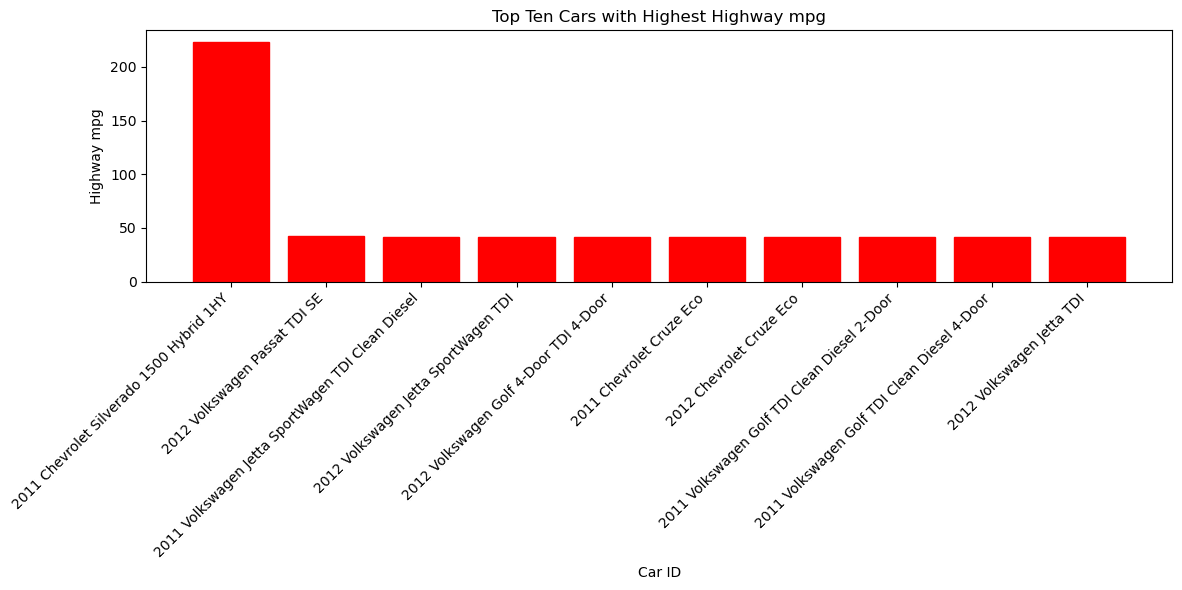

In [55]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Sort the data by 'Fuel Information.Highway mpg' in descending order
sorted_data = df.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Select the top ten cars based on 'Fuel Information.Highway mpg'
top_ten_cars = sorted_data.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_ten_cars['Identification.ID'], top_ten_cars['Fuel Information.Highway mpg'], color='skyblue')

# Color the bars red if Engine Information.Hybrid is true
for bar, is_hybrid in zip(bars, top_ten_cars['Engine Information.Hybrid']):
    if is_hybrid:
        bar.set_color('red')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Top Ten Cars with Highest Highway mpg')
plt.tight_layout()
plt.show()


This is interesting, since I know that the TDI models for Volkswagen are not hybrids. I can see that the Chevrolet Silverado 1500 hybrid is a hybrid, since it mentions that in its name, however I can confidently tell you that TDI, meaning diesel injection, does not mean it is a hybrid. From the data clarity side, this does make sense that the top ten cars in terms of miles per gallon would all be hybrids, however this is simply not the case, since I know that these TDI cars do not have electric motors in them. This is interesting, since that does mean that there is faulty data, even though it wasn't in the original single outlier that I was thinking it would be.

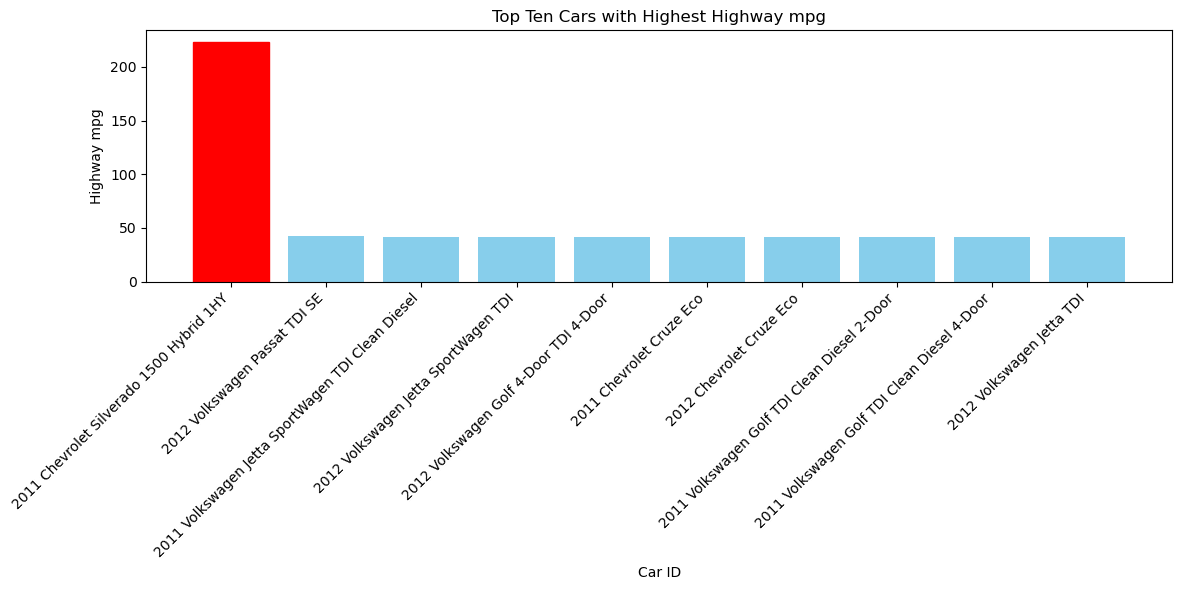

In [56]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Sort the data by 'Fuel Information.Highway mpg' in descending order
sorted_data = df.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Select the top ten cars based on 'Fuel Information.Highway mpg'
top_ten_cars = sorted_data.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
bars = plt.bar(top_ten_cars['Identification.ID'], top_ten_cars['Fuel Information.Highway mpg'], color='skyblue')

# Color the bars red if 'Engine Information.Engine Type' contains the word 'hybrid'
for bar, engine_type in zip(bars, top_ten_cars['Engine Information.Engine Type']):
    if 'hybrid' in engine_type.lower():
        bar.set_color('red')

plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Top Ten Cars with Highest Highway mpg')
plt.tight_layout()
plt.show()


In this fixed graph, we can see that the only hybrid, the only correct hybrid, is now indicated red on this graph. We can see that it does 223 miles per gallon (as per the spreadsheet), which makes sense given that hybrid cars simply out do many other types of cars in terms of fuel efficiency. To make the playing field more equal however, let us compare hybrids against hybrids, and diesels against diesels, or hybrids against hybrids, and everything else against everything else.

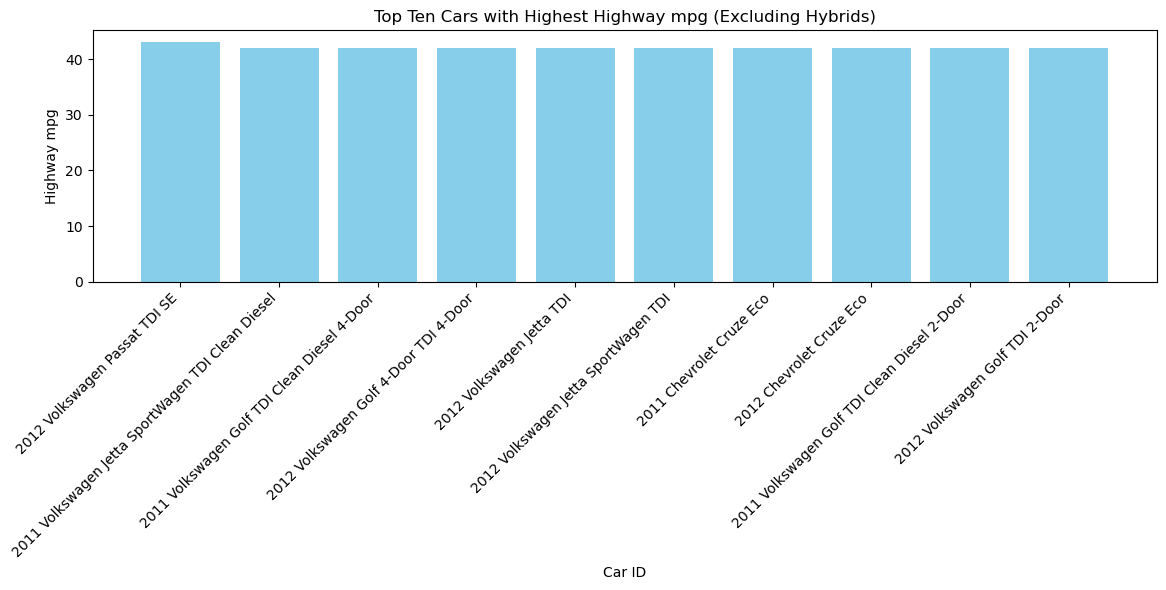

In [57]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Filter out rows where 'Engine Information.Engine Type' contains the word 'hybrid'
filtered_data = df[~df['Engine Information.Engine Type'].str.contains('hybrid', case=False)]

# Sort the filtered data by 'Fuel Information.Highway mpg' in descending order
sorted_data = filtered_data.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Select the top ten cars based on 'Fuel Information.Highway mpg'
top_ten_cars = sorted_data.head(10)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_ten_cars['Identification.ID'], top_ten_cars['Fuel Information.Highway mpg'], color='skyblue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Top Ten Cars with Highest Highway mpg (Excluding Hybrids)')
plt.tight_layout()
plt.show()


Looking at this graph, we can see that there are now a lot less outliers, and taller values. We can see that diesels commonly dominate this high PG space, with I believe, electric car in the mix as well. Checking the different types of fuel, I will make the graph below.

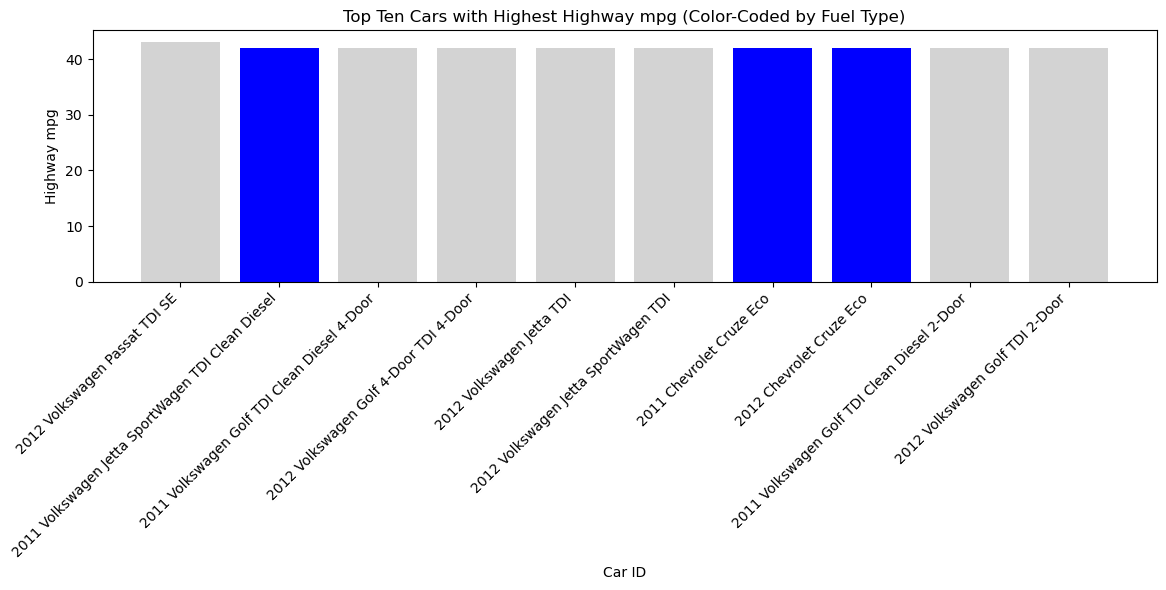

In [61]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Filter out rows where 'Engine Information.Engine Type' contains the word 'hybrid'
filtered_data = df[~df['Engine Information.Engine Type'].str.contains('hybrid', case=False)]

# Sort the filtered data by 'Fuel Information.Highway mpg' in descending order
sorted_data = filtered_data.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Select the top ten cars based on 'Fuel Information.Highway mpg'
top_ten_cars = sorted_data.head(10)

# Create the bar chart with different colors based on 'Fuel Information.Fuel Type'
colors = []
for fuel_type in top_ten_cars['Fuel Information.Fuel Type']:
    if fuel_type == 'Compressed natural gas':
        colors.append('green')
    elif fuel_type == 'Diesel fuel':
        colors.append('lightgrey')
    else:
        colors.append('blue')

plt.figure(figsize=(12, 6))
plt.bar(top_ten_cars['Identification.ID'], top_ten_cars['Fuel Information.Highway mpg'], color=colors)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Top Ten Cars with Highest Highway mpg (Color-Coded by Fuel Type)')
plt.tight_layout()
plt.show()


We can see in this chart that three out of the top ten cars are rated as non diesel cars. Technically only two out of 10, if you count the 2011 Volkswagen Jetta sport wagon TDI clean diesel as a diesel car as it states. This is interesting, since the type of car in the data set is noted as clean diesel, which may have set off the data set creator to call it gasoline instead. Comparing with more cars however let us get a better view of the car industry. It is interesting to note, that Volkswagen seems to be dominating the market in this section, even disregarding the diesel slashed on diesel issue that we are facing. The only two cars to appear on this top ten list that are not volkswagens, or the Chevrolet Cruze eco from 2011 and 2012. Those cars are pulling 40 plus miles per gallon, and, having looking that car up, it is very nondescript and non inspiring.

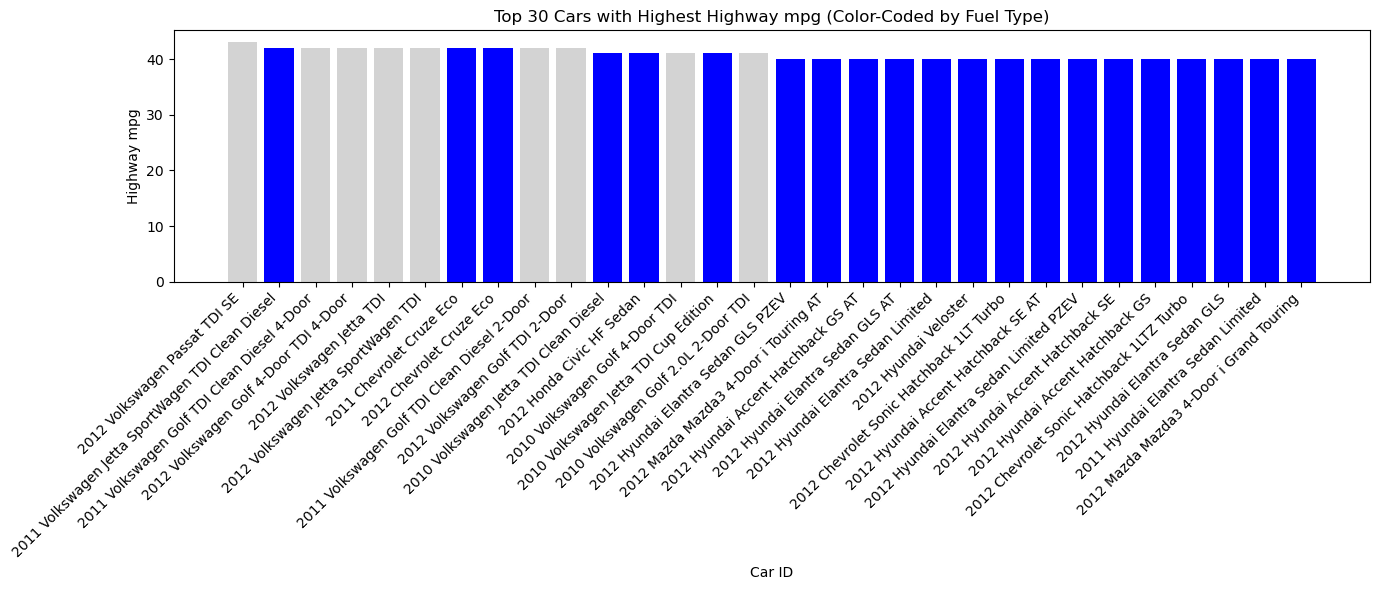

In [63]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Filter out rows where 'Engine Information.Engine Type' contains the word 'hybrid'
filtered_data = df[~df['Engine Information.Engine Type'].str.contains('hybrid', case=False)]

# Sort the filtered data by 'Fuel Information.Highway mpg' in descending order
sorted_data = filtered_data.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Select the top 30 cars based on 'Fuel Information.Highway mpg'
top_thirty_cars = sorted_data.head(30)

# Create the bar chart with different colors based on 'Fuel Information.Fuel Type'
colors = []
for fuel_type in top_thirty_cars['Fuel Information.Fuel Type']:
    if fuel_type == 'Compressed Natural Gas':
        colors.append('green')
    elif fuel_type == 'Diesel fuel':
        colors.append('lightgrey')
    else:
        colors.append('blue')

plt.figure(figsize=(14, 6))
plt.bar(top_thirty_cars['Identification.ID'], top_thirty_cars['Fuel Information.Highway mpg'], color=colors)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Top 30 Cars with Highest Highway mpg (Color-Coded by Fuel Type)')
plt.tight_layout()
plt.show()


Again, we have the same issue where diesel cars are not properly marked, and that does cause an issue, when there are more gasoline cars that are showing up. So let me fix that right now, to show which cars are diesel.

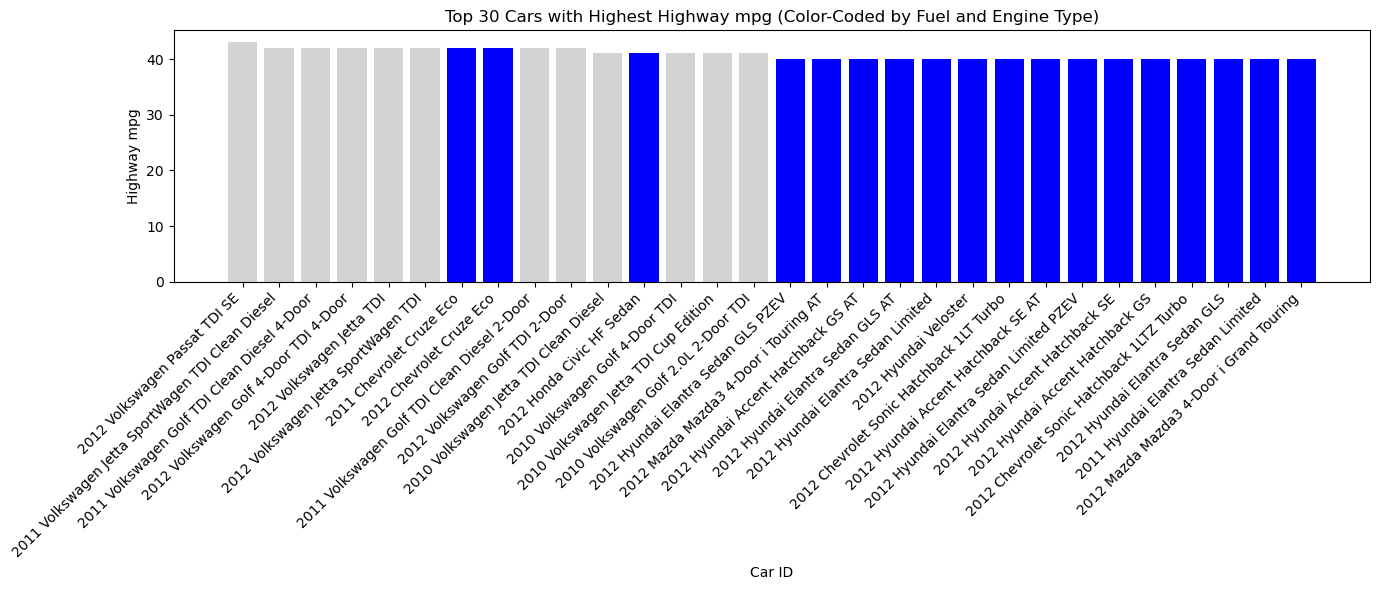

In [64]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Filter out rows where 'Engine Information.Engine Type' contains the word 'hybrid'
filtered_data = df[~df['Engine Information.Engine Type'].str.contains('hybrid', case=False)]

# Sort the filtered data by 'Fuel Information.Highway mpg' in descending order
sorted_data = filtered_data.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Select the top 30 cars based on 'Fuel Information.Highway mpg'
top_thirty_cars = sorted_data.head(30)

# Create the bar chart with different colors based on 'Fuel Information.Fuel Type' and 'Engine Information.Engine Type'
colors = []
for fuel_type, engine_type in zip(top_thirty_cars['Fuel Information.Fuel Type'], top_thirty_cars['Engine Information.Engine Type']):
    if 'diesel' in engine_type.lower() or fuel_type == 'Diesel':
        colors.append('lightgrey')
    elif fuel_type == 'Compressed Natural Gas':
        colors.append('green')
    else:
        colors.append('blue')

plt.figure(figsize=(14, 6))
plt.bar(top_thirty_cars['Identification.ID'], top_thirty_cars['Fuel Information.Highway mpg'], color=colors)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Top 30 Cars with Highest Highway mpg (Color-Coded by Fuel and Engine Type)')
plt.tight_layout()
plt.show()


Having fixed that, we can now see that 13 out of the top 30 cars are all diesel, in terms of highest MPG. It is interesting to note though, that most of these cars will end up having approximately the same miles per gallon, in the long run. This is because, there are not that many huge differences in all of these cars, since they all differ by about many miles per gallon at maximum. However, we must remember that the hybrid from earlier does show that it beats out gasoline cars, compressed natural gas cars, diesel cars handily.

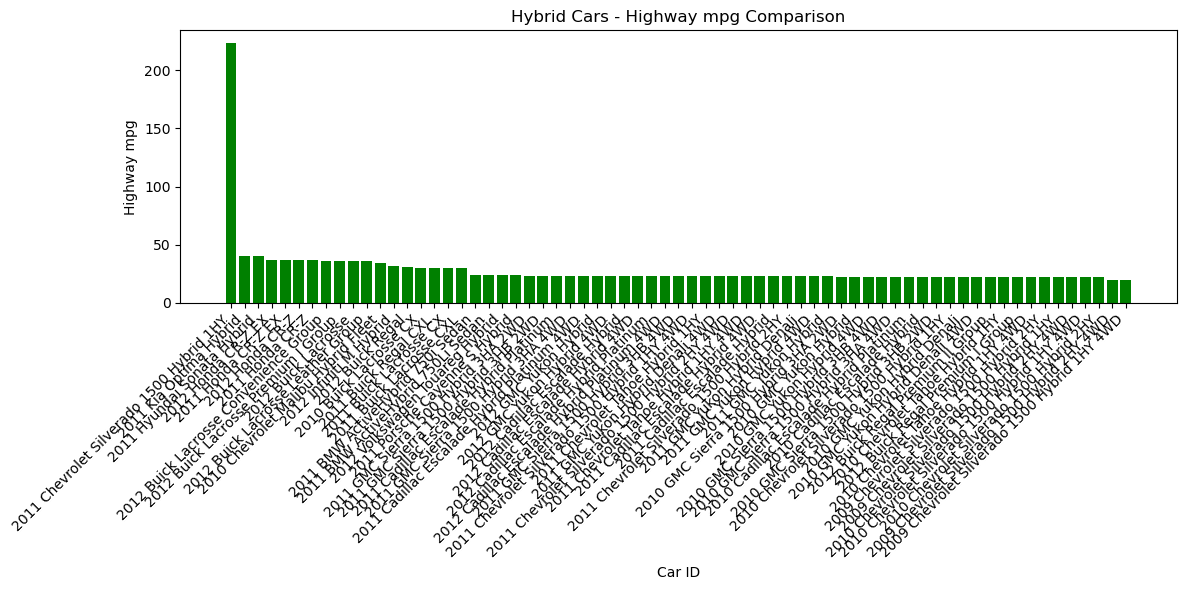

In [65]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Filter out rows where 'Engine Information.Engine Type' contains the word 'hybrid'
hybrid_cars = df[df['Engine Information.Engine Type'].str.contains('hybrid', case=False)]

# Sort the data by 'Fuel Information.Highway mpg' in descending order
sorted_hybrid_cars = hybrid_cars.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_hybrid_cars['Identification.ID'], sorted_hybrid_cars['Fuel Information.Highway mpg'], color='green')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Hybrid Cars - Highway mpg Comparison')
plt.tight_layout()
plt.show()


Comparing just the hybrids, we can still see that the 2011 Chevy Silverado 1500 hybrid still takes the lead, at 223 miles per gallon approximately. So, in order to evaluate it properly against its competitors, and its competitors against their own competitors, let us take that outlier out once again.

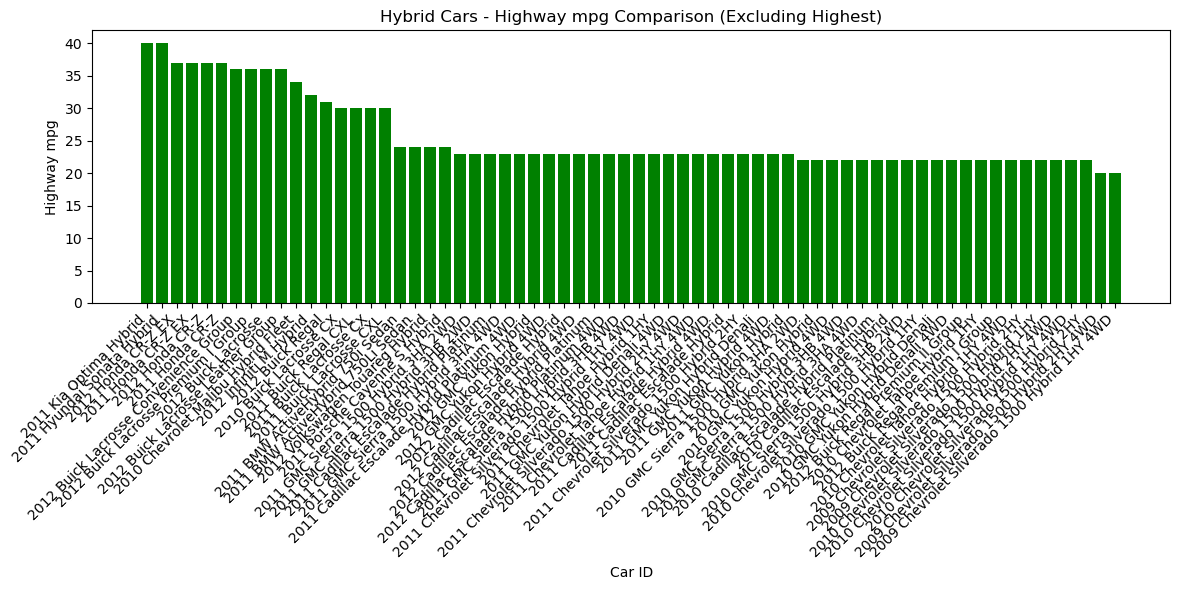

In [66]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Filter out rows where 'Engine Information.Engine Type' contains the word 'hybrid'
hybrid_cars = df[df['Engine Information.Engine Type'].str.contains('hybrid', case=False)]

# Sort the data by 'Fuel Information.Highway mpg' in descending order
sorted_hybrid_cars = hybrid_cars.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Remove the first result (highest highway mpg) from the comparison
sorted_hybrid_cars = sorted_hybrid_cars.iloc[1:]

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_hybrid_cars['Identification.ID'], sorted_hybrid_cars['Fuel Information.Highway mpg'], color='green')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Hybrid Cars - Highway mpg Comparison (Excluding Highest)')
plt.tight_layout()
plt.show()


Remove the Chevrolet Silverado 1500, we can now have a decent comparison between the rest of the hybrid vehicles, which do show quite a bit of difference. First of all, we can see that the weakest performer is a 2009 Chevrolet Silverado 1500 hybrid 1 highway 4 wheel drive, which is interesting, since it's newer sibling does seem to take the crown of highest miles per gallon on any EV slash plug in hybrid slash gasoline slash diesel powered car. Which of course, it's interesting, since most of the Chevy silverados are all placing at the bottom of the list, at approximately 20 miles per gallon or so. Which leads me to believe that the 2012 Chevy Silverado, or 2011, for that matter were not high performing EV's, and that the data is erroneous, and it was meant to be 22.3, instead of 223.

This does lead to the interesting conclusion that the 2011 Kia Optima hybrid, and the 2011 hyundai sonata hybrid, both perform exceedingly well at exactly 40 miles per gallon. Which also does put us at an interesting junction, since that does mean that these hybrids underperform compared to their diesel counterparts at Volkswagen.

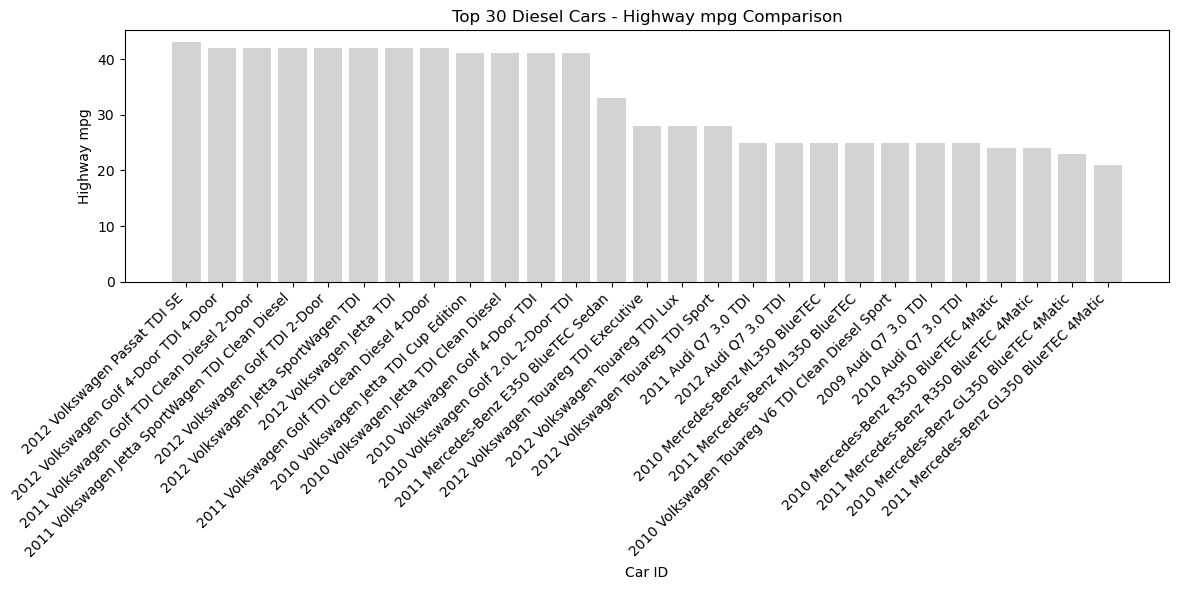

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Filter out rows where 'Engine Information.Engine Type' contains the word 'diesel'
diesel_cars = df[df['Engine Information.Engine Type'].str.contains('diesel', case=False)]

# Sort the data by 'Fuel Information.Highway mpg' in descending order
sorted_diesel_cars = diesel_cars.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Select the top 30 diesel cars based on 'Fuel Information.Highway mpg'
top_thirty_diesel_cars = sorted_diesel_cars.head(30)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_thirty_diesel_cars['Identification.ID'], top_thirty_diesel_cars['Fuel Information.Highway mpg'], color='lightgrey')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Top 30 Diesel Cars - Highway mpg Comparison')
plt.tight_layout()
plt.show()


We can see that, looking at the top 30 diesel cars, that they all seem to have approximately 40 miles per gallon. However, there is an interesting detail, since they all happen to be Volkswagen cars. The nearest competitive car is the 2011 Mercedes-Benz E350 bluetec sedan, which scores in at about 32 or so miles per gallon. This may give some foreshadowing to the diesel gate issue that Volkswagen will be facing in the next coming years. In that case, more accurately, standard diesel cars have been performing OK-ishly, at around or below 30 miles per gallon. Usually hovering around the 24 miles per gallon mark.

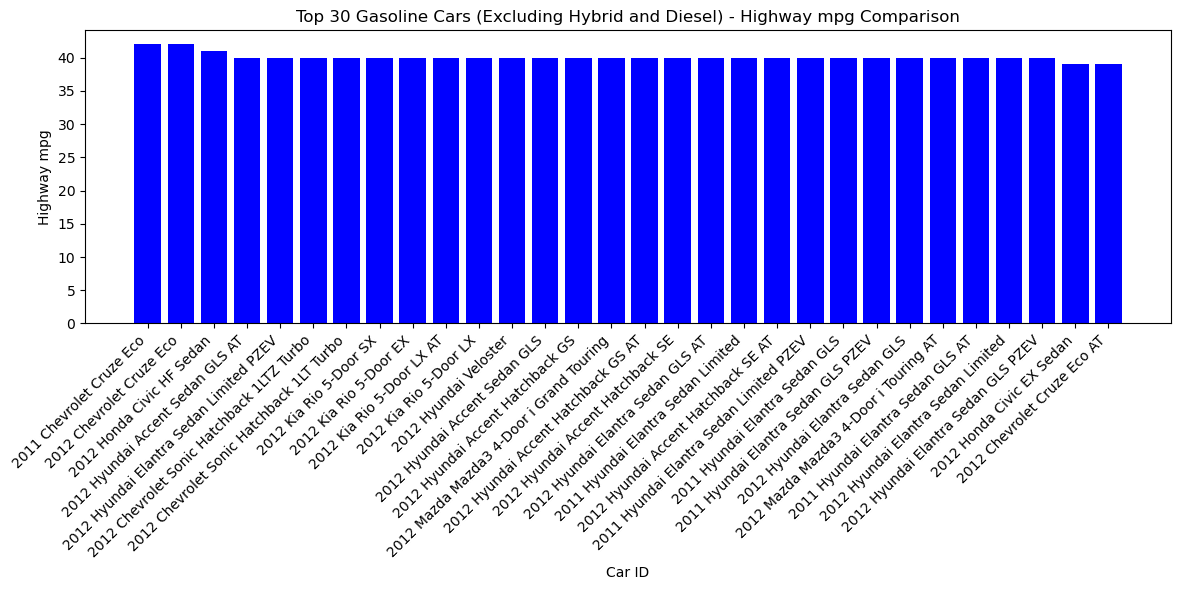

In [69]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Filter out rows where 'Engine Information.Engine Type' contains 'hybrid' or 'diesel'
gasoline_cars = df[~df['Engine Information.Engine Type'].str.contains('hybrid|diesel', case=False)]

# Filter out rows where 'Fuel Information.Fuel Type' is 'Gasoline'
gasoline_cars = gasoline_cars[gasoline_cars['Fuel Information.Fuel Type'] == 'Gasoline']

# Sort the data by 'Fuel Information.Highway mpg' in descending order
sorted_gasoline_cars = gasoline_cars.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Select the top 30 gasoline cars based on 'Fuel Information.Highway mpg'
top_thirty_gasoline_cars = sorted_gasoline_cars.head(30)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_thirty_gasoline_cars['Identification.ID'], top_thirty_gasoline_cars['Fuel Information.Highway mpg'], color='blue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Top 30 Gasoline Cars (Excluding Hybrid and Diesel) - Highway mpg Comparison')
plt.tight_layout()
plt.show()


Now this graph above, shows the comparison between upper gasoline cars. As I mentioned before, the fuel type section of this data set isn't completely accurate, so I did some additional sorting to make sure that no diesels or hybrids were included in this. There is still a chance that hybrids are still included in this, however there's only so much I can do. Regardless, we can see that the 2011 Chevrolet Cruze eco and the 2011 Chevrolet cruise eco take the crown for the highest performing gasoline car, at approximately 41 to 42 miles per gallon. This is followed closely by the 2012 Honda Civic HF sedan and the 2012 Hyundai accent sedan GLS AT. Hyundai and Chevrolet continue switching positions for 4th 5th 6th and 7th place, with the Hyundai accent, elantra, versus Sonic LT and LTZ.

Something interesting that I do want to look for, is that I see a mention of turbo. I would like to compare the cars that mentioned that they have a turbo. This may sound slightly pretentious, since turbo does generally have the connotation of performing better, however it is important to know that turbocharged cars can perform better with smaller engines, and so do end up providing a higher fuel efficiency in certain conditions. Given that we have seen that very few turbos have appeared in the top ten, 30, of the previous charts, let me view the turbos by themselves.

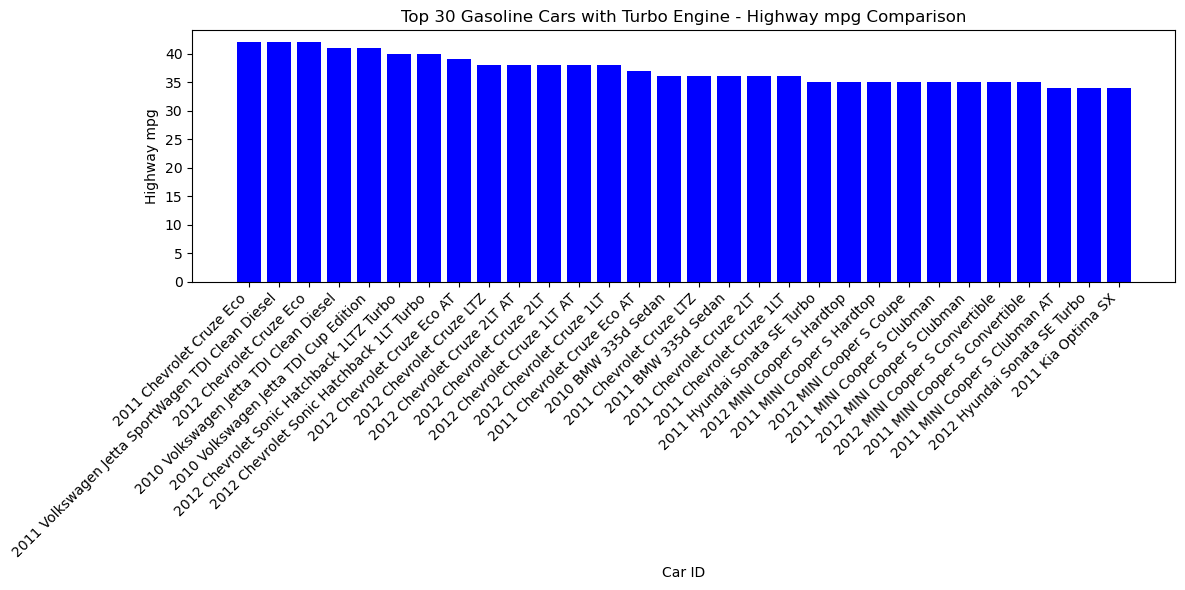

In [74]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Filter out rows where 'Engine Information.Engine Type' does not contain 'turbo'
turbo_gasoline_cars = df[df['Engine Information.Engine Type'].str.contains('turbo', case=False)]

# Filter out rows where 'Fuel Information.Fuel Type' is 'Gasoline'
turbo_gasoline_cars = turbo_gasoline_cars[turbo_gasoline_cars['Fuel Information.Fuel Type'] == 'Gasoline']

# Sort the data by 'Fuel Information.Highway mpg' in descending order
sorted_turbo_gasoline_cars = turbo_gasoline_cars.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Select the top 30 gasoline cars based on 'Fuel Information.Highway mpg'
top_thirty_turbo_gasoline_cars = sorted_turbo_gasoline_cars.head(30)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_thirty_turbo_gasoline_cars['Identification.ID'], top_thirty_turbo_gasoline_cars['Fuel Information.Highway mpg'], color='blue')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Top 30 Gasoline Cars with Turbo Engine - Highway mpg Comparison')
plt.tight_layout()
plt.show()


Although this does show how closely all the turbocharged cars perform to one another in miles per gallon, it doesn't exactly show much else other than that. Let us revisit the chart from earlier, which showed the top 30 cars in terms of miles per gallon, and let us see which one of them have turbo chargers.

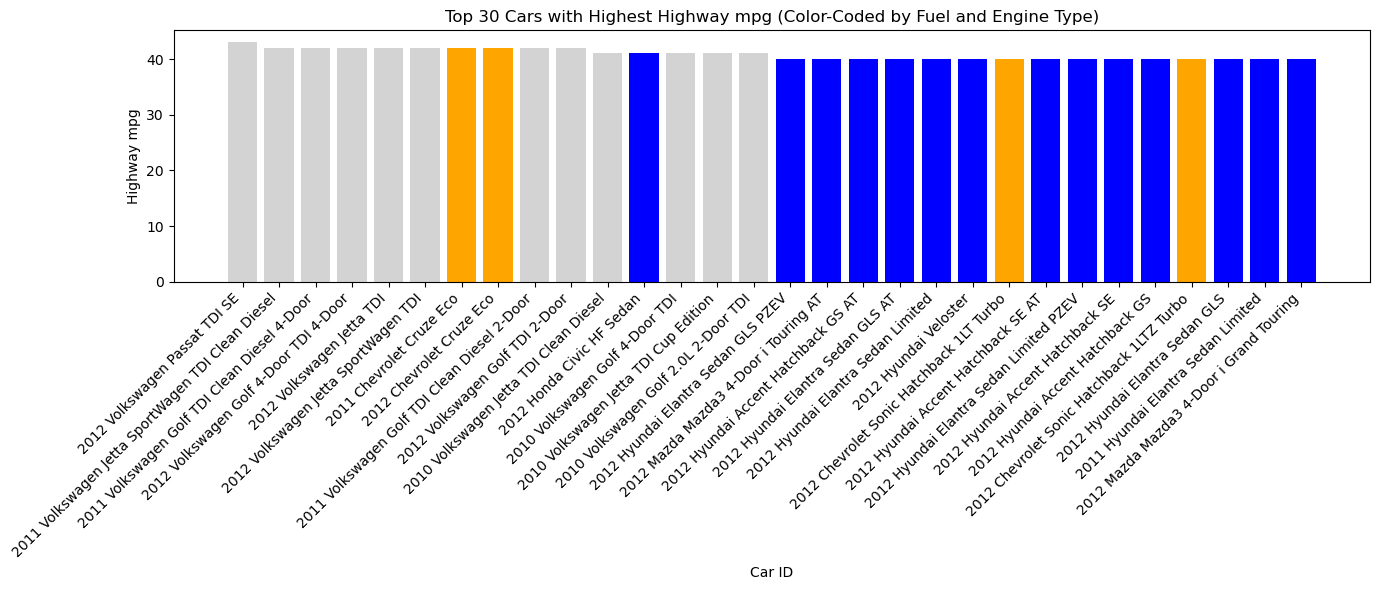

In [76]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Filter out rows where 'Engine Information.Engine Type' contains the word 'hybrid'
filtered_data = df[~df['Engine Information.Engine Type'].str.contains('hybrid', case=False)]

# Sort the filtered data by 'Fuel Information.Highway mpg' in descending order
sorted_data = filtered_data.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Select the top 30 cars based on 'Fuel Information.Highway mpg'
top_thirty_cars = sorted_data.head(30)

# Create the bar chart with different colors based on 'Fuel Information.Fuel Type' and 'Engine Information.Engine Type'
colors = []
for fuel_type, engine_type in zip(top_thirty_cars['Fuel Information.Fuel Type'], top_thirty_cars['Engine Information.Engine Type']):
    if 'diesel' in engine_type.lower() or fuel_type == 'Diesel':
        colors.append('lightgrey')
    elif fuel_type == 'Compressed Natural Gas':
        colors.append('green')
    elif 'turbo' in engine_type.lower():
        colors.append('orange')
    else:
        colors.append('blue')

plt.figure(figsize=(14, 6))
plt.bar(top_thirty_cars['Identification.ID'], top_thirty_cars['Fuel Information.Highway mpg'], color=colors)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Top 30 Cars with Highest Highway mpg (Color-Coded by Fuel and Engine Type)')
plt.tight_layout()
plt.show()


We can see in this chart that four out of the top 30 cars do have turbochargers, which implies that diesel in general, can handle itself perfectly fine, without a turbocharger. It is interesting to see, that the two outliers for gasoline high performers, are not hybrids, but are instead turbocharged with small engines. And it is even more interesting to see that the 2012 Honda Civic HF sedan almost matches every single miles per gallon champion, while not being diesel, or having a turbocharger in it. The next five cars are also still very important, and interesting, such as the 2012 Mazda Mazda 3, the 2012 Hyundai accent, the 2012 Hyundai Elantra sedan, the 2012 Hyundai Elantra sedan limited. All seven of these cars, are either 40 miles per gallon or 39 miles per gallon, and are all top gasoline cars, also including the 2012 hyundai veloster.

Also, just for fun, I will be checking out the top E85 cars.

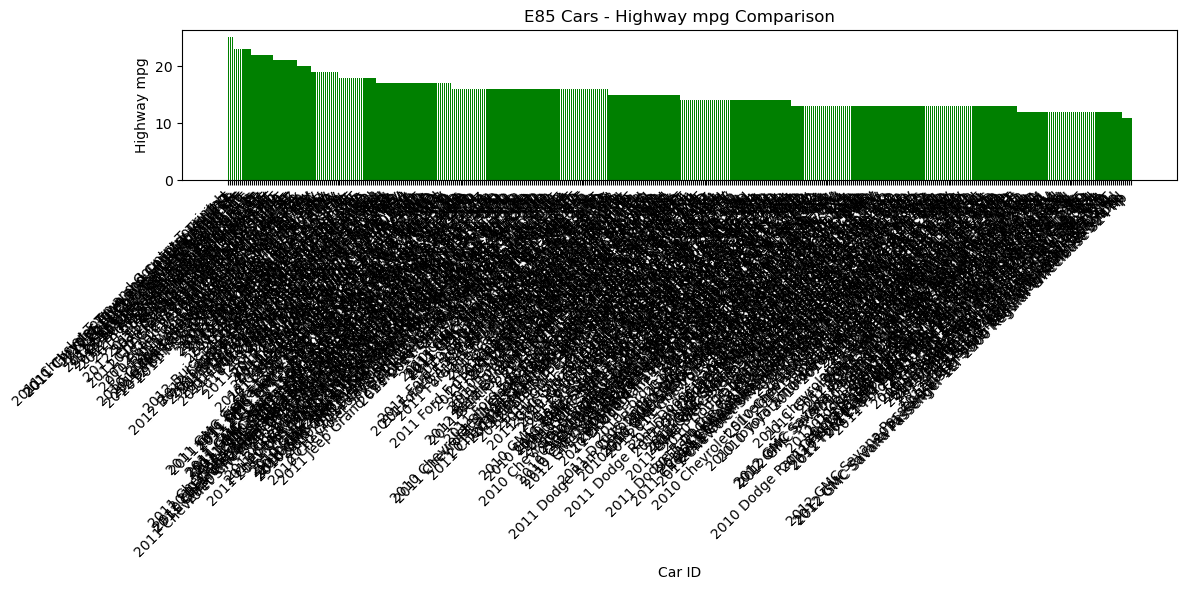

In [80]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Filter out rows where 'Fuel Information.Fuel Type' is 'E85'
e85_cars = df[df['Fuel Information.Fuel Type'] == 'E85']

# Sort the data by 'Fuel Information.Highway mpg' in descending order
sorted_e85_cars = e85_cars.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(sorted_e85_cars['Identification.ID'], sorted_e85_cars['Fuel Information.Highway mpg'], color='green')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('E85 Cars - Highway mpg Comparison')
plt.tight_layout()
plt.show()


Again, I forgot how many cars there are in this data set, and this data is unreadable. Let me take the top 30.

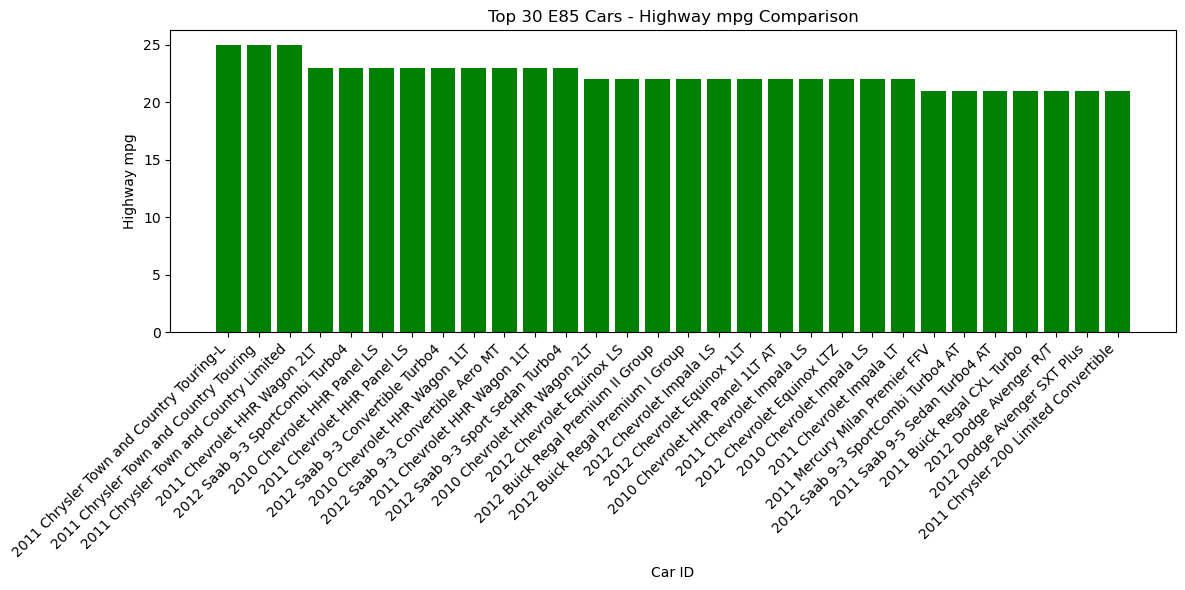

In [81]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Filter out rows where 'Fuel Information.Fuel Type' is 'E85'
e85_cars = df[df['Fuel Information.Fuel Type'] == 'E85']

# Sort the data by 'Fuel Information.Highway mpg' in descending order
sorted_e85_cars = e85_cars.sort_values(by='Fuel Information.Highway mpg', ascending=False)

# Select the top 30 E85 cars based on 'Fuel Information.Highway mpg'
top_thirty_e85_cars = sorted_e85_cars.head(30)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(top_thirty_e85_cars['Identification.ID'], top_thirty_e85_cars['Fuel Information.Highway mpg'], color='green')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Top 30 E85 Cars - Highway mpg Comparison')
plt.tight_layout()
plt.show()


To give some insight into this data, it appears that the top three cars for this set, can only handle approximately 25 miles per gallon or less. These cars would be the Chrysler town and country touring-L, Turing, Limited trims. What's the other 85 cars aren't doing so much better either, as I mentioned, they are doing 25 miles per gallon or lower, at best. Most of these higher performers seem to be chevrolets, sabs, with a singular mercury Milan in the middle, with a few buicks as well. And of course, let us look at the worst performance for E85, which should show the worst performance of the entire data set.

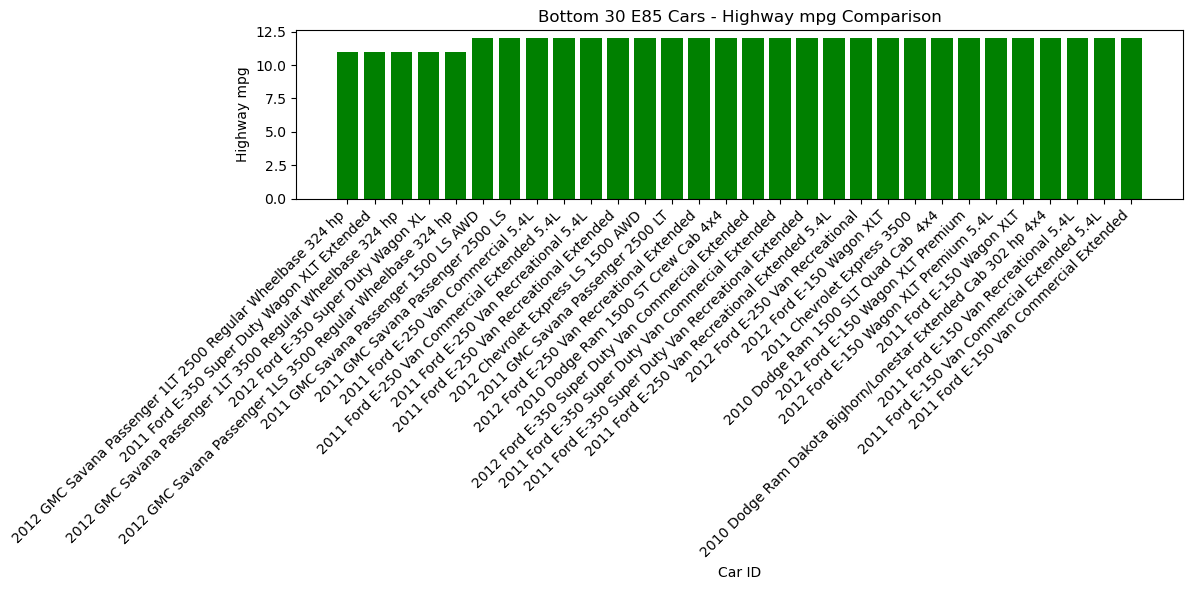

In [82]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Filter out rows where 'Fuel Information.Fuel Type' is 'E85'
e85_cars = df[df['Fuel Information.Fuel Type'] == 'E85']

# Sort the data by 'Fuel Information.Highway mpg' in ascending order
sorted_e85_cars = e85_cars.sort_values(by='Fuel Information.Highway mpg', ascending=True)

# Select the bottom 30 E85 cars based on 'Fuel Information.Highway mpg'
bottom_thirty_e85_cars = sorted_e85_cars.head(30)

# Create the bar chart
plt.figure(figsize=(12, 6))
plt.bar(bottom_thirty_e85_cars['Identification.ID'], bottom_thirty_e85_cars['Fuel Information.Highway mpg'], color='green')
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Bottom 30 E85 Cars - Highway mpg Comparison')
plt.tight_layout()
plt.show()


We can see that the gym see Savannah passenger gives approximately 11 miles per gallon, at best, on the highway, and the Ford E-350 super duty wagon is not further behind. It is interesting to see that GMC and Ford are scoring at the bottom of this list, since these are meant to be utility vehicles. At least, usually.

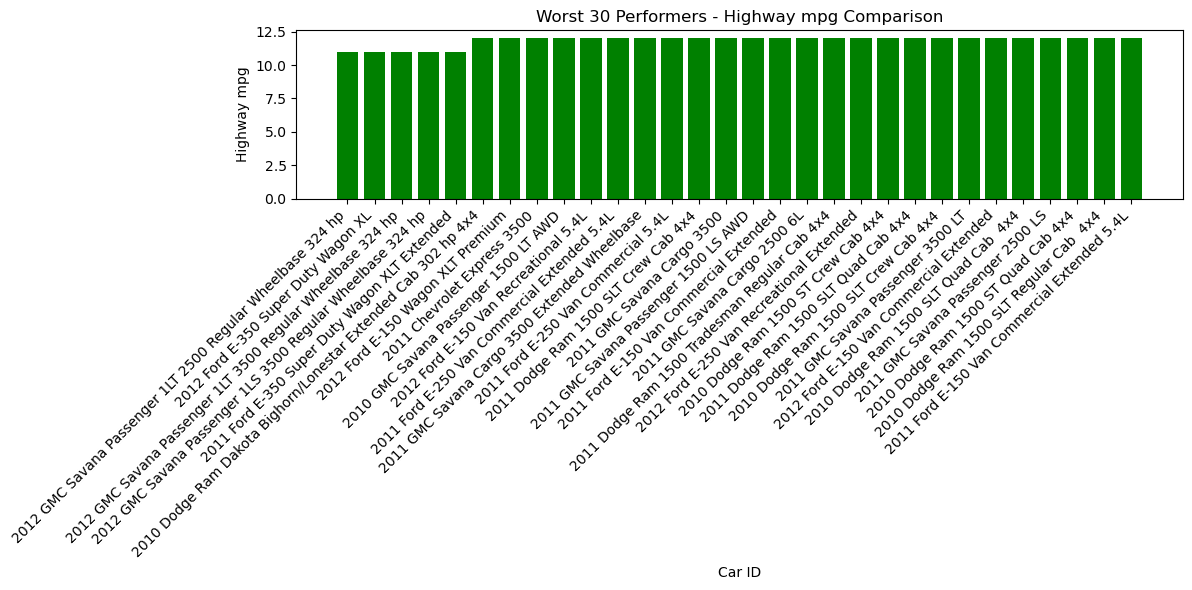

In [84]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the dataset
url = "https://corgis-edu.github.io/corgis/datasets/csv/cars/cars.csv"
df = pd.read_csv(url)

# Sort the data by 'Fuel Information.Highway mpg' in ascending order
sorted_cars = df.sort_values(by='Fuel Information.Highway mpg', ascending=True)

# Select the worst 30 performers based on 'Fuel Information.Highway mpg'
worst_thirty_cars = sorted_cars.head(30)

# Create a list of colors for each car based on 'Fuel Information.Fuel Type'
colors = ['green' if fuel_type == 'E85' else 'red' for fuel_type in worst_thirty_cars['Fuel Information.Fuel Type']]

# Create the bar chart with conditional coloring
plt.figure(figsize=(12, 6))
plt.bar(worst_thirty_cars['Identification.ID'], worst_thirty_cars['Fuel Information.Highway mpg'], color=colors)
plt.xticks(rotation=45, ha='right', fontsize=10)
plt.xlabel('Car ID')
plt.ylabel('Highway mpg')
plt.title('Worst 30 Performers - Highway mpg Comparison')
plt.tight_layout()
plt.show()


Not much to say, these are E85 cars only. These are the worst performers on the entire dataset.